# **Medical Cost Personal**

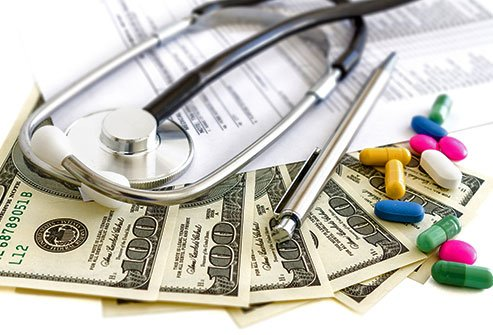

In this work, we will explore a dataset dedicated to the cost of treating different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age, etc. We do not have data on the diagnosis of patients. But we have other information that can help us build patient clusters and know for each cluster the characteristics that define it.This will help us to draw a conclusion on the factors that allow to decrease or increase the cost of medical treatment.

In what follows we will try to explore our data, then we will use **Gaussian Mixture Algorithm** for clustering .

**Columns :**


*   age: age of primary beneficiary
*   sex: insurance contractor gender, female, male

*   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   children: Number of children covered by health insurance / Number of dependents


*   smoker: Smoking
*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*   charges: Individual medical costs billed by health insurance


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# **Step 0 : Import the data**

In [ ]:
#import the data
df = pd.read_csv("https://raw.githubusercontent.com/FZ-hajji/ML_Project/main/insurance.csv",)
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# **Step 1 : Data Processing and Visualisation :**



*   For a start, we will encode categorical features.




In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [ ]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


**Missing values :**

In [ ]:
#Count the empty values in each column 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A good day is when there is no "NaN"in the data 😃 Let's look at our data to understand something about it.

**Distribution of Medical Charges**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


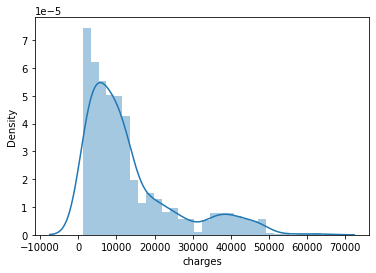

In [ ]:
sns.distplot(df.charges)



*   Types of Distributions: We have a right skewed distribution in which most patients are being charged between  2000− 12000.




**Age Analysis**

Turning Age into Categorical Variables:
* Young Adult: from 18 - 35
* Senior Adult: from 36 - 55
* Elder: 56 or older






In [ ]:
df1=df.copy()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#create a new variable "age_cat"
df1['age_cat'] = np.nan
lst = [df1]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df1["age_cat"].unique().tolist()
amount = df1["age_cat"].value_counts().tolist()

colors = ["cyan", "blue", " magenta"]
trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

Share of each Category: Young Adults (42.9%), Senior Adults (41%) and Elder (16.1%)

**Who got charged more on Average by Age?**

In [ ]:
from plotly import tools
# Means
avg_ya_charge = df1["charges"].loc[df1["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df1["charges"].loc[df1["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df1["charges"].loc[df1["age_cat"] == "Elder"].mean()
print("Means")
print(avg_ya_charge)
print(avg_sa_charge)
print(avg_e_charge)
# Median
med_ya_charge = df1["charges"].loc[df1["age_cat"] == "Young Adult"].median()
med_sa_charge = df1["charges"].loc[df1["age_cat"] == "Senior Adult"].median()
med_e_charge = df1["charges"].loc[df1["age_cat"] == "Elder"].median()
print("Medians")
print(med_ya_charge )
print(med_sa_charge)
print(med_e_charge)
average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(
        color="cyan"
    )
)
med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(
        color="magenta"
    )
)


fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)
fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="Age Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

Means
9744.478281339718
14785.693053029197
18795.993815787024
Medians
4252.167025000001
9565.00995
13429.6502


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead




*   Patient Charge Mean: For young adults it is 9,744, for Senior Adults it is 14,785 and for the elder it is 18,795.
*   Patient Charge Median: For young adults it is 4,252, for Senior Adults it is 9,565 and for the elder it is 13,429.



**Sex**

In [ ]:
from plotly import tools
# Means
man_charge = df1["charges"].loc[df1["sex"] == 1].mean()
woman_charge = df1["charges"].loc[df1["sex"] == 0].mean()

print("Means")
print(man_charge)
print(woman_charge)

# Median
med_man_charge = df1["charges"].loc[df1["sex"] == 1].median()
med_woman_charge = df1["charges"].loc[df1["sex"] == 0].median()

print("Medians")
print(med_man_charge)
print(med_woman_charge)

average_plot = go.Bar(
    x=['Man', 'Woman'],
    y=[man_charge , woman_charge],
    name='Mean',
    marker=dict(
        color="cyan"
    )
)
med_plot = go.Bar(
    x=['Man', 'Woman'],
    y=[med_man_charge, med_woman_charge],
    name='Median',
    marker=dict(
        color="magenta"
    )
)


fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by sex','Median Charge by sex'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)
fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="sex Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

Means
13956.751177721886
12569.57884383534
Medians
9369.61575
9412.9625


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



We see here that there isn't a big difference in billing between the two sexes

**Weight Status**

Turning BMI into Categorical Variables:

*  **Under Weight:** Body Mass Index (BMI)  <  18.5
*  **Normal Weight:** Body Mass Index (BMI)  ≥  18.5 and Body Mass Index (BMI)  <  24.9

*  **Overweight:** Body Mass Index (BMI)  ≥  25 and Body Mass Index (BMI)  <  29.9
* **Obese :**Body Mass Index (BMI)  >  30





In [ ]:
#create a new variable "weight_condition"
df1["weight_condition"] = np.nan
lst = [df1]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
labels = df1["weight_condition"].unique().tolist()
amount = df1["weight_condition"].value_counts().tolist()

colors = ["green", "blue", "yellow","orange"]
trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by weight condition")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

**Weight Status vs Charges**

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_facet_grid(
    df,
    x='age',
    y='charges',
    color_name='weight_condition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Underweight': 'rgb(208, 246, 130)', 'Normal Weight': 'rgb(166, 246, 130)',
             'Overweight': 'rgb(251, 232, 238)', 'Obese': 'rgb(253, 45, 28)'}
)
251, 232, 238


fig['layout'].update(title="Weight Status vs Charges", width=800, height=600, plot_bgcolor='rgb(251, 251, 251)', 
                     paper_bgcolor='rgb(255, 255, 255)')
iplot(fig, filename='facet - custom colormap')

* **Overweight:** Notice how there are two groups of people that get significantly charged more than the other group of overweight people.
*  **Obese:** Same thing goes with the obese group, were a significant group is charged more than the other group.



So, might the smoking status have to do with this phenomenon?

**For obese people :**

In [ ]:

chargedist_sm = df1["charges"].loc[(df1["weight_condition"] == "Obese") & (df1["smoker"] == 1)].values
chargedist_nsm = df1["charges"].loc[(df1["weight_condition"] == "Obese") & (df1["smoker"] == 0)].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'Obese Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]
layout = dict(title="Deeper Look into Obese condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
              )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

**For overweight people :**

In [ ]:
chargedist_sm = df1["charges"].loc[(df1["weight_condition"] == "Overweight") & (df1["smoker"] == 1)].values
chargedist_nsm = df1["charges"].loc[(df1["weight_condition"] == "Overweight") & (df1["smoker"] == 0)].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'overweight Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]
layout = dict(title="Deeper Look into overweight condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
              )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

So the obese group who were charged the most is associated with people who smoke and the overweight group of people, smokers are charged the most which makes sense.

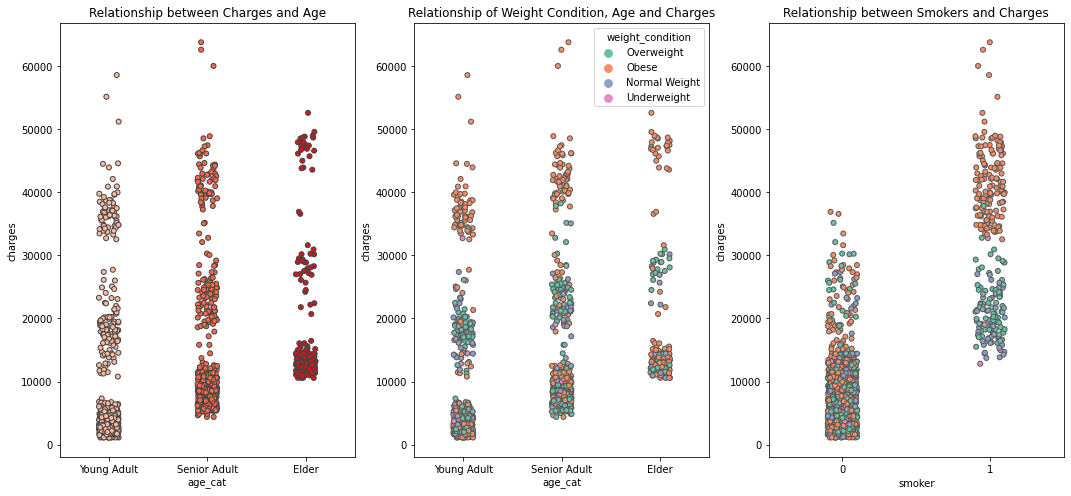

In [ ]:
import seaborn as sns
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df1, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df1, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df1, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

We notice in the right figure above that each age group is divided into three subgroups. By introducing the factors BMI and smoker, we deduce that the subgroups in the upper part in each age group are associated obese people and smokers, and the subgroups that are in the middle are associated with overweight people and smokers.



*   In the next part, we will use the 'Gaussian Mixture' clustering alogorithm and we will try to compare it with kmeans and a manual clustering done.



# **Step 2 : Model**

**Remark :** Since we are going to work with an unsupervised algorithm, we didn't  need training data because we didn't yet know the characteristics of the clusters that we will obtain


*   So that we can visualize our clusters in the plans, we will reduce the dimension of our data by using PCA




**PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  


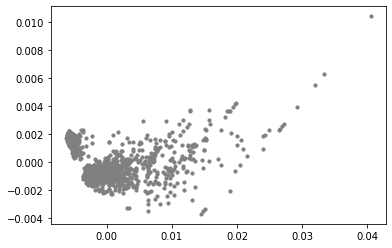

In [ ]:

plt.scatter(X_principal['P1'], X_principal['P2'], c='grey', s=10)
plt.show()

**Gaussian Mixture**

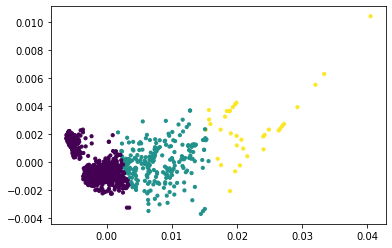

In [ ]:
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
#we choose 3 clusters
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X_principal)
labels = gmm.predict(X_principal)

plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=10, cmap='viridis')

we define a function which allows to draw an eclipse surrounded by each cluster

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle,**kwargs,color="black"))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    X=X.iloc
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=10, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

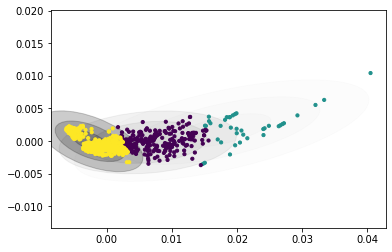

In [ ]:
gmm = mixture.GaussianMixture(n_components=3)
plot_gmm(gmm, X_principal)

**Kmeans**

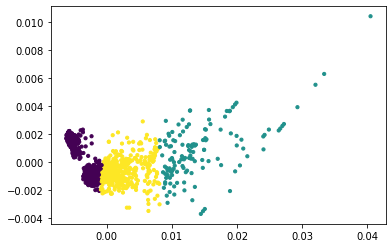

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)
labels = kmeans.predict(X_principal)

plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=10, cmap='viridis')



*   One of the good things about GMM is that they can handle a wider variety of shapes, mostly clusters that form ellipses. Something like K-Means is only really good for roughly spherical clusters.

*   Another positive point is that these models allow soft clustering. K-Means is a strict classification model where each data point is assigned to a single cluster. The Gaussian mixture method, however, calculates the probabilities of data points belonging to clusters.These probabilities can be obtained using the **predict_proba ()** method after fitting the model.



In [ ]:
gmm.predict_proba(X_principal)

array([[9.97712448e-01, 2.27440898e-03, 1.31427040e-05],
       [2.64533244e-16, 4.94976393e-01, 5.05023607e-01],
       [4.59718917e-01, 5.33276148e-01, 7.00493496e-03],
       ...,
       [1.46611492e-23, 1.08953063e-01, 8.91046937e-01],
       [6.81678364e-05, 9.34751504e-01, 6.51803281e-02],
       [9.95635121e-01, 4.33595543e-03, 2.89230928e-05]])

**Number of components(k) selection**

 **Silhouette score :**

This score, as clearly stated by the [SKlearn](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) developers, consider two measures:


*   The mean distance between a sample and all other points in the same cluster.
*   The mean distance between a sample and all other points in the next nearest cluster.





i.e. it checks how much the clusters are compact and well separated. The more the score is near to one, the better the clustering is.

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
from sklearn import metrics
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=mixture.GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

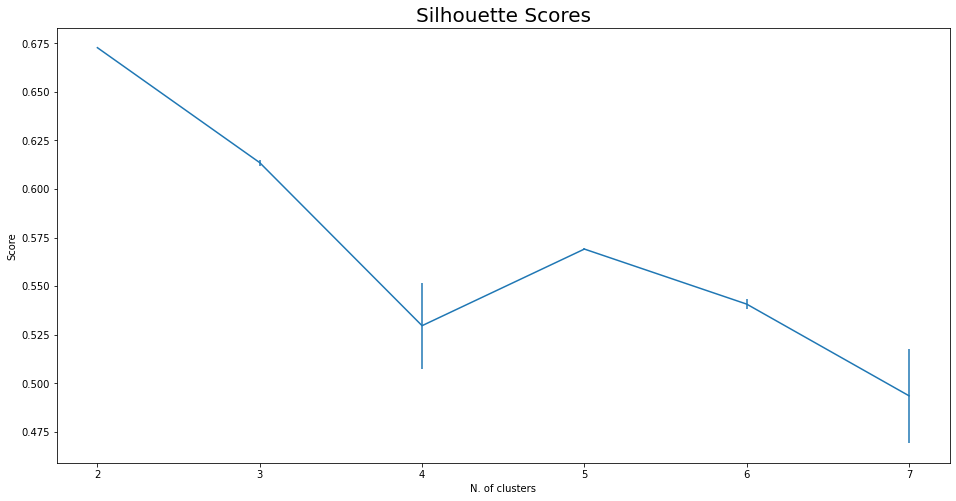

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

It turns out that we get the best score with two clusters. We have also to consider that also the three clusters configuration is almost equally good.

**Distance between GMMs :**

Here we form two datasets, each with an half randomly choose amount of data. We will then check how much the GMMs trained on the two sets are similar, for each configuration.
Since we are talking about distributions, the concept of similarity is embedded in the  [Jensen-Shannon (JS) metric](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence). The lesser is the JS-distance between the two GMMs, the more the GMMs agree on how to fit the data.

In [ ]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [ ]:
from sklearn.model_selection import train_test_split
n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X_principal, test_size=0.5)
        
        gmm_train=mixture.GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=mixture.GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names

/usr/local/lib/python3.7/dis

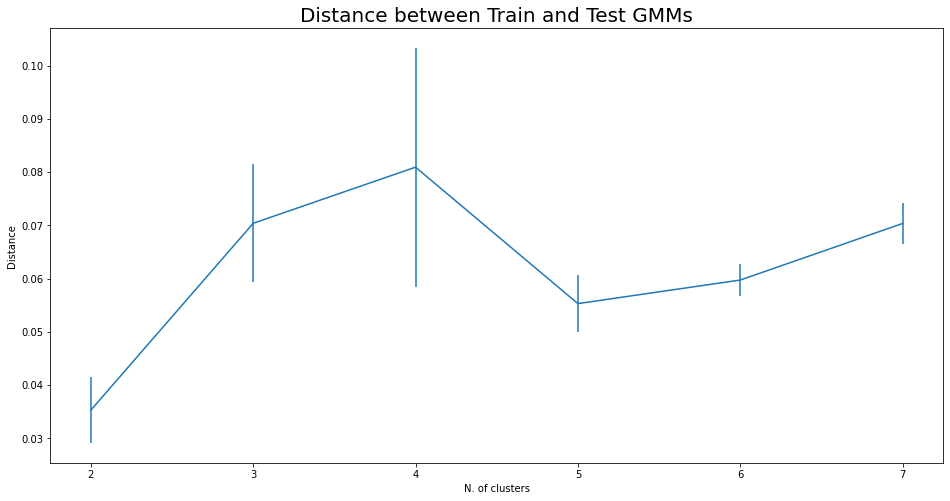

In [ ]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

Following this technique, the configuration with two clusters is the most conservative

**Bayesian information criterion (BIC) :**

This criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have. In order to avoid overfitting, this technique penalizes models with big number of clusters.

In [ ]:
n_clusters=np.arange(2, 10)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=mixture.GaussianMixture(n, n_init=2).fit(X_principal) 
        
        tmp_bic.append(gmm.bic(X_principal))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

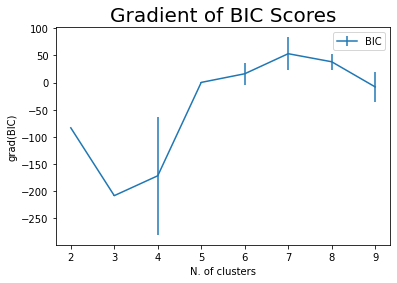

In [ ]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In this case ,  we get the best score with three clusters. 

We have explored three different techniques to choose the right number of clusters which can be discerned in this dataset. The results are in the table below:

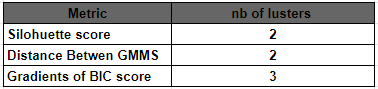



*   Then, it is preferable to choose K = 2




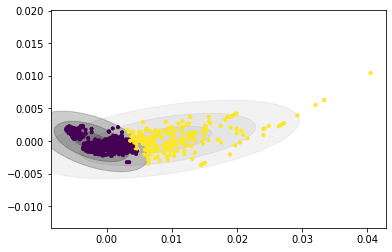

In [ ]:
gmm1 = mixture.GaussianMixture(n_components=2)
plot_gmm(gmm1, X_principal)

Returning to the first part of this work, where we tried to explore and visualize our baseline data and we found as a result that overweight or obese smokers are the most charged

**The manual cluster :**

Text(17, 40000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

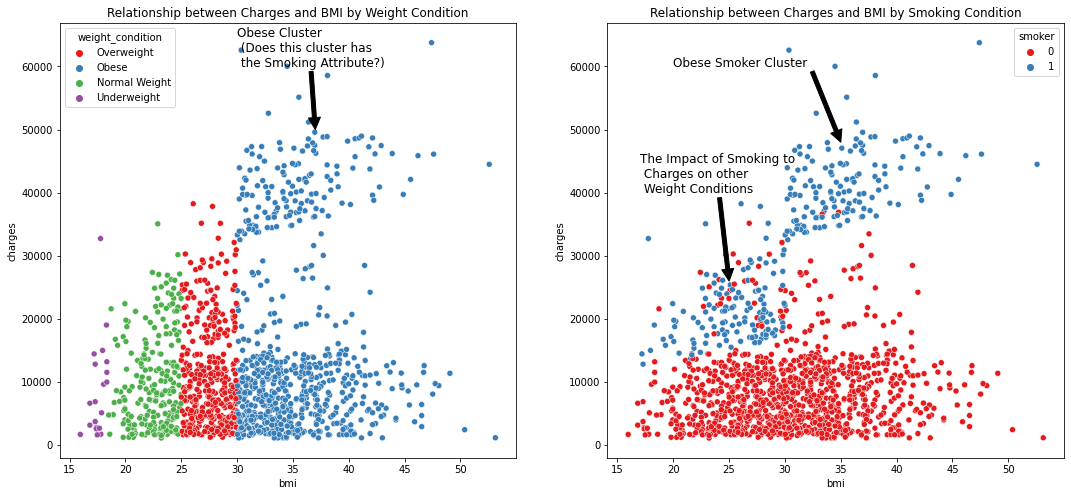

In [ ]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df1, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df1, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

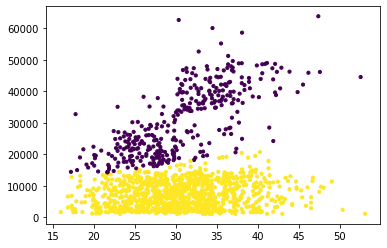

In [ ]:
#We use GMM
X1 = df1[["bmi", "charges"]]
gmm2 = mixture.GaussianMixture(n_components=2)
gmm2.fit(X1)
labels = gmm2.predict(X1)
plt.scatter(X1['bmi'], X1['charges'], c=labels, s=10, cmap='viridis')

In [ ]:
gmm2.means_

array([[   30.30304663, 29366.05091568],
       [   30.7952275 ,  7381.99242064]])

We notice that the two clusters obtained are overweight but not the same charges , the purple cluster is charged more than the yellow cluster and according to the manual cluster the purple cluster probably contains smokers.